In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw

In [6]:
# 可視化メソッド
def plot_result(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

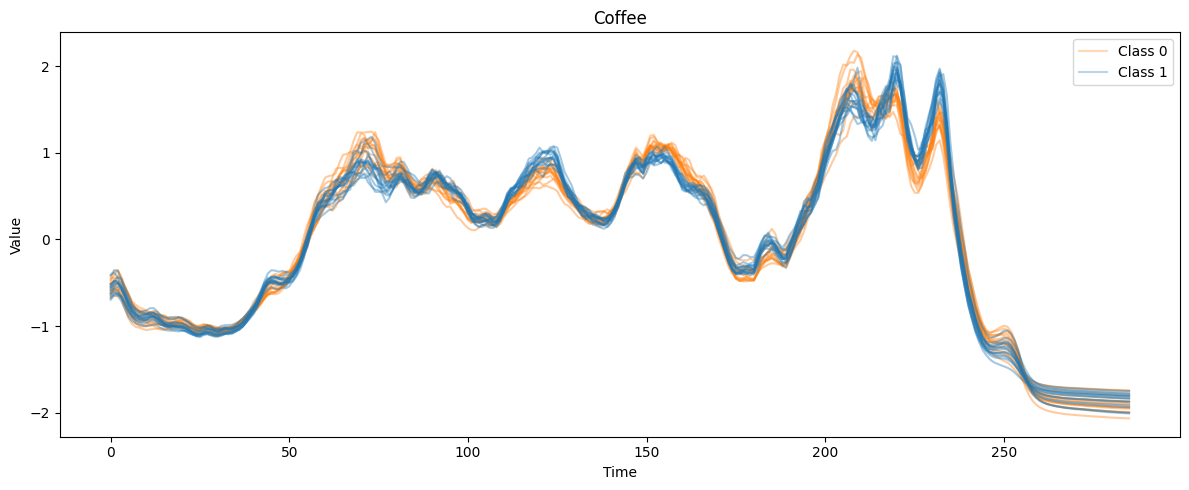

In [7]:
# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Coffee")

plot_result(X_train, y_train, 'Coffee')

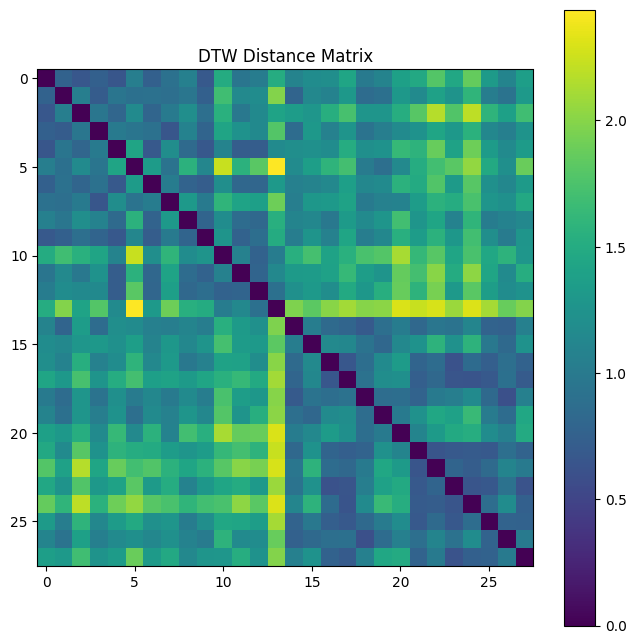

In [2]:
# データの正規化
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)

# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()

違うデータで試す

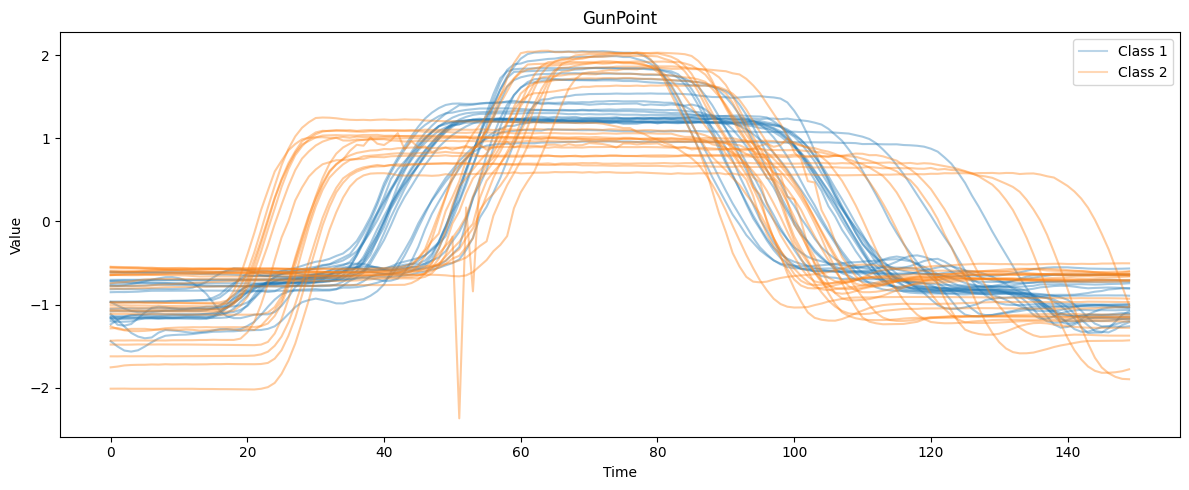

In [9]:
# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("GunPoint")

plot_result(X_train, y_train, 'GunPoint')

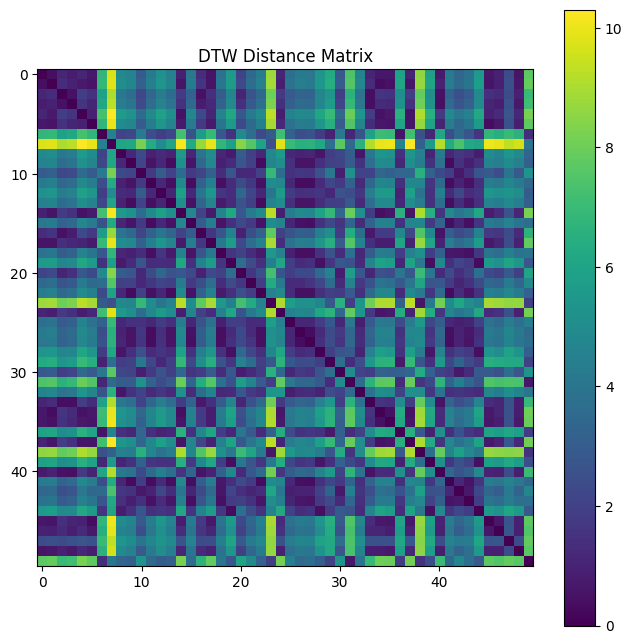

In [10]:
# データの正規化
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)

# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()